## Fourier transform of a geometric progression

If we are given the following geometric progression function:
\begin{equation}
y(k) = R^{-k}
\end{equation}


[1.99804688+0.00000000e+00j 1.34905418-6.65798042e-01j
 0.89764196-5.04859144e-01j 0.73981301-3.04720139e-01j
 0.6814596 -1.42595045e-01j 0.66601562-2.79850929e-17j
 0.6814596 +1.42595045e-01j 0.73981301+3.04720139e-01j
 0.89764196+5.04859144e-01j 1.34905418+6.65798042e-01j]
[ 1.99804688+0.00000000e+00j -1.05009223-1.07728386e+00j
 -0.42945884+9.36060332e-01j  0.7776313 +1.88327403e-01j
  0.07496665-6.92170890e-01j -0.66601562-2.16705078e-16j
  0.07496665+6.92170890e-01j  0.7776313 -1.88327403e-01j
 -0.42945884-9.36060332e-01j -1.05009223+1.07728386e+00j]
[0.0078125 -6.60794288e-17j 0.00390625-8.93517946e-17j
 0.00195312-6.76967786e-17j 1.        +2.93482466e-16j
 0.5       +1.22012678e-16j 0.25      +7.06566681e-17j
 0.125     -4.38478666e-17j 0.0625    -9.59312089e-17j
 0.03125   -5.27411427e-17j 0.015625  -7.05035919e-17j]


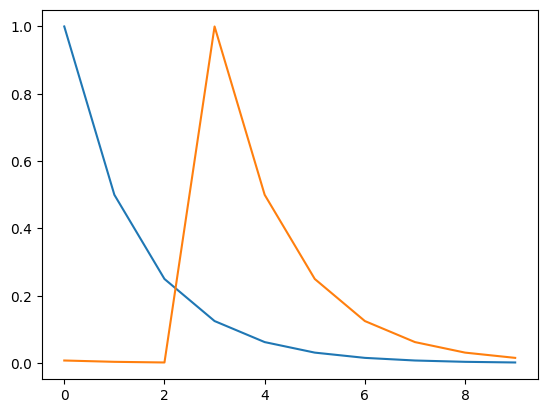

In [85]:
import numpy as np
import matplotlib.pyplot as plt

R = 2

fig, ax = plt.subplots()


def y_l(A):
    out = np.zeros(len(A))
    for i in range(0, len(A)):
        out[i] = R**-A[i]
    return out


def g(k, N):
    return np.exp(-2j * np.pi * k / N) * R**-1

N = 10
y = np.linspace(0,N-1,N)
y_l_y = y_l(y)

# Plot original function
ax.plot(y,y_l_y)

# Calculate Fourier transform of the Geometric progression function: y(k) = 2^-k
G = np.zeros(N, dtype=complex)
for i in range(0,N):
    G[i] = (1 - g(i,N)**N) / (1 - g(i,N))
    
print(G)



delta = 3
# Multiply the frequency values by a phase shift of delta
for i in range(0,N):
    G[i] = np.exp(-2j * np.pi * i * delta / N) * G[i]
    
    
print(G)
final_output = np.fft.ifft(G)

# print(new_g)
# final_output = np.fft.ifft(new_g)
print(final_output)
ax.plot(y, final_output.real)